In [2]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
Consumer_Key = "4ULPRtFT3HLt0BkTaiekOIdPT"
Consumer_Secret_Key = "ieBQdKIaEXwbhzTt1zLOWg8iaeCyj4rUrPIIYzjnZwcqel0FN4"
Access_Token = "824737660837076992-fpY3cDgWF0jFDITpUOp0T4s2aBr22uR"
Access_Token_Secret = "nA5rxn944Exzt8xaYcMe4R1tsmxCBzeyRxzpl6SXIWz1R"

In [4]:
auth = tweepy.OAuthHandler(Consumer_Key,Consumer_Secret_Key)
auth.set_access_token(Access_Token,Access_Token_Secret)
api = tweepy.API(auth)

In [16]:
posts = api.user_timeline(screen_name="Telkomsel", count = 1000, lang ="en", tweet_mode="extended")

#Print the last 5 tweets
print("Show the 5 recent tweets:\n")
i=1
for tweet in posts[:5]:
  print(str(i) +') '+ tweet.full_text + '\n')
  i=i+1

Show the 5 recent tweets:

1) @prawikautary Hai, Kak Prawika. Maaf ya jadi ga nyaman. Mengenai keluhan yang dialami, boleh infokan nomor HP, nama lengkap, tempat dan tanggal lahir. Kirim via DM ya, agar dapat dibantu pengecekkan dan privasi terjaga. Makasih :) -Ruina

2) @teguhikhsan Baik, Kak Teguh. Mimin cek DM Kakak udah masuk antrian, mohon ditunggu ya. Dengan senang hati mimin akan merespon DM nya. Makasih :) -Cheryl

3) @_yudista_ Hai, Kak Abi. Maaf ya untuk keluhan tidak ada paket 4G Ceria di aplikasi MyTelkomsel, silakan clear cache, kemudian coba kembali. Jika masih berkendala, yuk infoin nomor HP, tanggal kendala, dan lokasi via DM untuk mimin cek ya. Tks :) -Rayan

4) @teguhikhsan Hai, Kak Teguh, Maaf ya jadi ga nyaman. Mengenai keluhan naik limit berhasil limit belum bertambah, boleh infokan nomor HP, nama lengkap, tempat dan tanggal lahir. Kirim via DM ya, agar dapat dibantu pengecekkan dan privasi terjaga. Makasih :) -Ruina

5) @13umx Baik, Kak. Mimin cek DM Kakak udah ma

In [17]:
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])
#Show the first 5 rows of data
df.head()

,Tweets
0,"@prawikautary Hai, Kak Prawika. Maaf ya jadi g..."
1,"@teguhikhsan Baik, Kak Teguh. Mimin cek DM Kak..."
2,"@_yudista_ Hai, Kak Abi. Maaf ya untuk keluhan..."
3,"@teguhikhsan Hai, Kak Teguh, Maaf ya jadi ga n..."
4,"@13umx Baik, Kak. Mimin cek DM Kakak udah masu..."


In [18]:
def cleanTxt(text):
  text = re.sub('@[A-Za-z0-9]+', '', text) #Removing @mentions
  text = re.sub('#', '', text) #Removing '#' hash tag
  text = re.sub('RT[\s]+', '', text) #Removing RT
  text = re.sub('https?:\/\/\S+', '', text) #Removing hyperlink

  return text

#Clean the tweets
df['Tweets'] = df['Tweets'].apply(cleanTxt)

#Show the cleaned tweets
df

,Tweets
0,"Hai, Kak Prawika. Maaf ya jadi ga nyaman. Men..."
1,"Baik, Kak Teguh. Mimin cek DM Kakak udah masu..."
2,"@_yudista_ Hai, Kak Abi. Maaf ya untuk keluhan..."
3,"Hai, Kak Teguh, Maaf ya jadi ga nyaman. Menge..."
4,"Baik, Kak. Mimin cek DM Kakak udah masuk antr..."
...,...
195,"_fia Hai, Kak Fia. Maafin ya jadi ga nyaman. U..."
196,"Halo, Kak Delta. Mengenai penggunaan kuota mu..."
197,"_myungsooL Hai, Kak. Mengenai pulsa monetay me..."
198,"_02 Hai, Kak Asrudin. Maaf atas kendalanya. Un..."


In [19]:
#Create a function to get the subjectivity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

#Create a function to get the polarity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

#Create two new columns 'Subjectivity' & 'Polarity'
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

#Show the new dataframe with columns 'Subjectivity' & 'Polarity'
df

,Tweets,Subjectivity,Polarity
0,"Hai, Kak Prawika. Maaf ya jadi ga nyaman. Men...",1.000000,0.5
1,"Baik, Kak Teguh. Mimin cek DM Kakak udah masu...",1.000000,0.5
2,"@_yudista_ Hai, Kak Abi. Maaf ya untuk keluhan...",0.691667,0.3
3,"Hai, Kak Teguh, Maaf ya jadi ga nyaman. Menge...",1.000000,0.5
4,"Baik, Kak. Mimin cek DM Kakak udah masuk antr...",1.000000,0.5
...,...,...,...
195,"_fia Hai, Kak Fia. Maafin ya jadi ga nyaman. U...",1.000000,0.5
196,"Halo, Kak Delta. Mengenai penggunaan kuota mu...",1.000000,0.5
197,"_myungsooL Hai, Kak. Mengenai pulsa monetay me...",1.000000,0.5
198,"_02 Hai, Kak Asrudin. Maaf atas kendalanya. Un...",0.691667,0.3


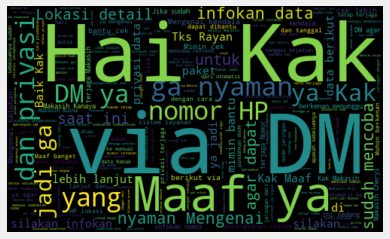

In [20]:
#Word cloud visualization
allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=10, max_font_size=110).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [22]:
#Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):


  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'
df['Analysis'] = df['Polarity'].apply(getAnalysis)
#Show the dataframe
df

,Tweets,Subjectivity,Polarity,Analysis
0,"Hai, Kak Prawika. Maaf ya jadi ga nyaman. Men...",1.000000,0.5,Positive
1,"Baik, Kak Teguh. Mimin cek DM Kakak udah masu...",1.000000,0.5,Positive
2,"@_yudista_ Hai, Kak Abi. Maaf ya untuk keluhan...",0.691667,0.3,Positive
3,"Hai, Kak Teguh, Maaf ya jadi ga nyaman. Menge...",1.000000,0.5,Positive
4,"Baik, Kak. Mimin cek DM Kakak udah masuk antr...",1.000000,0.5,Positive
...,...,...,...,...
195,"_fia Hai, Kak Fia. Maafin ya jadi ga nyaman. U...",1.000000,0.5,Positive
196,"Halo, Kak Delta. Mengenai penggunaan kuota mu...",1.000000,0.5,Positive
197,"_myungsooL Hai, Kak. Mengenai pulsa monetay me...",1.000000,0.5,Positive
198,"_02 Hai, Kak Asrudin. Maaf atas kendalanya. Un...",0.691667,0.3,Positive


In [23]:
print('Printing negative tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity'],ascending=False) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Negative'):
    print(str(j) + ') '+sortedDF['Tweets'][i])
    print()
    j=j+1

Printing negative tweets:

1) _ Duh, maaf ya Kak :( Mengenai Paket Combo Sakti merupakan Paket Promo ya Kak. Telkomsel memberikan penawaran secara personal sesuai dengan profile masing-masing pelanggan berdasarkan lama berlangganan dan rata-rata penggunaan dalam periode waktu yang telah ditentukan. (1/2)

2)  Hai, Kak. Maaf banget udah dibuat ga nyaman. Mengenai kendala ga bisa aktivasi paket dengan keterangan pembayaran dalam proses, silakan infokan data berikut via DM agar dibantu cek lebih lanjut dan privasi data Kakak tetap terjaga: (1/2)

3)   Siang, Kak. Makasih ya udah berkenan menunggu. Terkait kendala pembelian paket data Telkomsel melalui aplikasi Shopee yang Kakak alami. Silakan infokan data berikut via DM ya agar dapat mimin bantu cek dan privasi data terjaga: (1/2)

4)  Hai, Kak Yahya. Maaf ya udah bikin ga nyaman. Apabila Kakak mengalami kendala pada saat melakukan pembelian paket, silakan infokan data berikut via DM ya agar dapat mimin bantu cek dan privasi data terjaga:

In [24]:
print('Printing Positive tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity'],ascending=True) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Positive'):
    print(str(j) + ') '+sortedDF['Tweets'][i])
    print()
    j=j+1

Printing Positive tweets:

1)  Hai, Kak Prawika. Maaf ya jadi ga nyaman. Mengenai keluhan yang dialami, boleh infokan nomor HP, nama lengkap, tempat dan tanggal lahir. Kirim via DM ya, agar dapat dibantu pengecekkan dan privasi terjaga. Makasih :) -Ruina

2)  Baik, Kak Teguh. Mimin cek DM Kakak udah masuk antrian, mohon ditunggu ya. Dengan senang hati mimin akan merespon DM nya. Makasih :) -Cheryl

3) @_yudista_ Hai, Kak Abi. Maaf ya untuk keluhan tidak ada paket 4G Ceria di aplikasi MyTelkomsel, silakan clear cache, kemudian coba kembali. Jika masih berkendala, yuk infoin nomor HP, tanggal kendala, dan lokasi via DM untuk mimin cek ya. Tks :) -Rayan

4)  Hai, Kak Teguh, Maaf ya jadi ga nyaman. Mengenai keluhan naik limit berhasil limit belum bertambah, boleh infokan nomor HP, nama lengkap, tempat dan tanggal lahir. Kirim via DM ya, agar dapat dibantu pengecekkan dan privasi terjaga. Makasih :) -Ruina

5)  Baik, Kak. Mimin cek DM Kakak udah masuk antrian, mohon ditunggu ya. Dengan sena

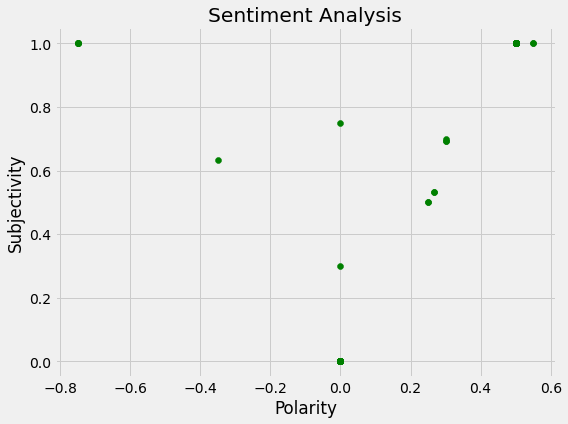

In [25]:
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
  plt.scatter(df["Polarity"][i], df["Subjectivity"][i], color='Green')
#plt.scatter(x,y,color)
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [26]:
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets ['Tweets']
ptweets

round( (ptweets.shape[0] / df.shape[0]) * 100, 1)

76.5

In [27]:
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets ['Tweets']
ntweets

round( (ntweets.shape[0] / df.shape[0]) * 100, 1)

3.5

In [28]:
#Show the values counts
df['Analysis'].value_counts()

Positive    153
Neutral      40
Negative      7
Name: Analysis, dtype: int64

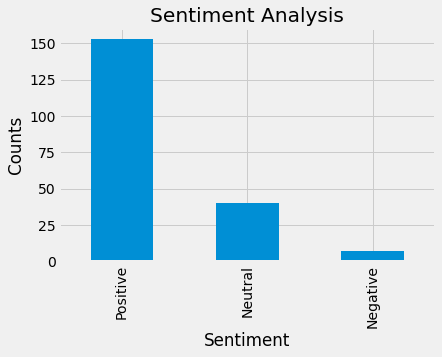

In [29]:
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()

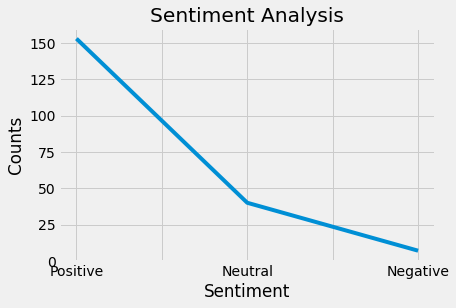

In [30]:
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'line')
plt.show()